# Example 8

The work developed in [1] presents a multiscale 3D chemotaxis assay by combining high-throughput 3D bacterial tracking with microfluidically created chemical gradients. The authors study a large dataset of 3D trajectories of bacteria, analysing statistical properties of the enseble.

This example shows how to use yupi in order to inspect the dataset of the aforementioned work. It focuses on reproducing some of the figures of the original paper focusing on showcasing yupi API for data processing and visualization for the case of 3D trajectories.


## 1. Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Line3DCollection

from yupi.core import JSONSerializer
from yupi.stats import collect
from yupi.graphics import plot_3d, plot_angles_hist

from utils.binner import Binner


## 2. Loading dataset

We downloaded the original dataset from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/7DF0AT). Then, we converted it into yupi trajectories while keeping just a subset of the whole dataset which we stored in the file 'ecoli_trajs.json'. We can load the trajectories as:


In [2]:
trajs = JSONSerializer.load_ensemble('resources/data/ecoli_trajs.json')

## 3. Plotting all trajectories

We can easily inspect all the trajectories in a single plot, partially reproducing the Figure 1b of the original paper: 

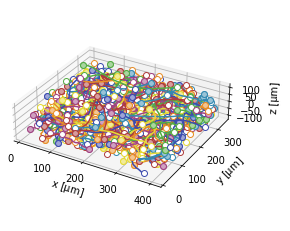

In [3]:
ax = plot_3d(trajs, legend=False, units='$\mathrm{\mu m}$', show=False)
ax.set_box_aspect((400, 350, 100))

## 4. Inspecting a single trajectory

Figure 1c from the original paper.

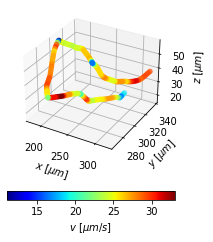

In [4]:
traj = trajs[257]
lbls = '${}~[{}]$'

ax = plt.axes(projection='3d')
x = ax.scatter(traj.r.x, traj.r.y, traj.r.z, c=traj.v.norm, cmap='jet')
plt.colorbar(x, location='bottom', label=lbls.format('v', '\mu m/s'), shrink=.5)
ax.update({f'{n}label': lbls.format(n, '\mu m') for n in 'xyz'})
plt.show()

## 5. Computing angles

Next, we can partially reproduce the figure 1e from the original paper by:

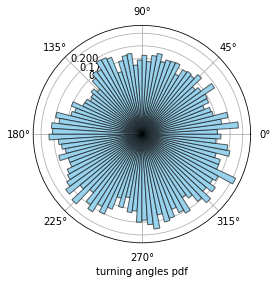

In [5]:
# Center every trajectory
for traj in trajs:
    traj -= traj.r[0]

xy_vel = collect(trajs, func=lambda v: v[:,:2], velocity=True)
angles = np.array([np.arctan2(v[1], v[0]) for v in xy_vel])
ax = plot_angles_hist(angles, bins=100, show=False)
ax.set_theta_zero_location("E")
plt.show()

## 6. Analysis of the velocity distribution according to z-axis position

Figure 1d of the original paper

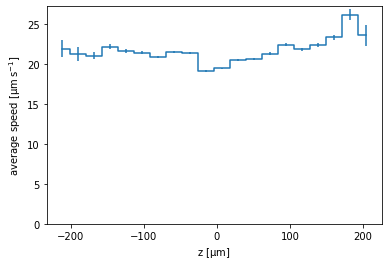

In [6]:
z = collect(trajs, func=lambda r: r.z)
v = collect(trajs, velocity=True, func=lambda v: np.linalg.norm(v, axis=1))

bn = Binner(z, v, count=20)

plt.errorbar(bn.center_bins, bn.y_binned_mean, yerr=bn.y_binned_sem, drawstyle='steps-mid')
plt.ylim(0, None)
plt.xlabel('z $\mathrm{[\mu m]}$')
plt.ylabel('average speed $\mathrm{[\mu m \,s^{-1}]}$')
plt.show()

## 7. References

[1] Grognot, M., & Taute, K. M. (2021). A multiscale 3D chemotaxis assay reveals bacterial navigation mechanisms. Communications biology, 4(1), 1-8.